In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# GradientDecent

In [2]:
df = pd.read_csv('insurance.csv')

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label = LabelEncoder()

In [8]:
df['sex'] = label.fit_transform(df['sex'])

In [11]:
df['smoker'] = label.fit_transform(df['smoker'])

In [12]:
df['region'] = label.fit_transform(df['region'])

In [15]:
X = df.drop('charges',axis = 1)

In [16]:
y = df['charges']

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import SGDRegressor

In [19]:
model = SGDRegressor()

In [20]:
model.fit(X,y)

SGDRegressor()

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
    np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(15485.121596340507)

In [24]:
y_test.mean()

np.float64(13017.24813835572)

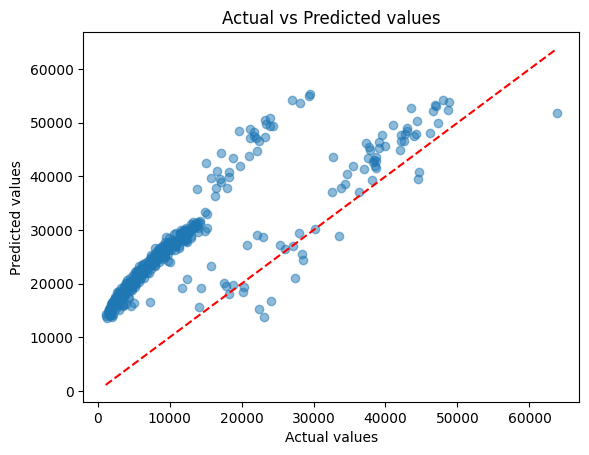

In [25]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# GridSearch

In [26]:
df_gs = pd.read_csv('insurance.csv')

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label = LabelEncoder()

In [29]:
df['sex'] = label.fit_transform(df['sex'])

In [30]:
df['smoker'] = label.fit_transform(df['smoker'])

In [31]:
df['region'] = label.fit_transform(df['region'])

In [34]:
X = df.drop('charges',axis = 1)

In [35]:
y = df['charges']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [36]:
X = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.linear_model import SGDRegressor

In [40]:
model = SGDRegressor()

In [41]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {
    'penalty':['11,12','elasticnet'],
    'alpha':[0.0001,0.001,0.1,1],
    'max_iter':[200,500,1000],
}

In [49]:
final_model = GridSearchCV(model, param_grid = params, cv = 3, verbose = 2, return_train_score = True )

In [50]:
final_model.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ..........alpha=0.0001, max_iter=200, penalty=11,12; total time=   0.0s
[CV] END ..........alpha=0.0001, max_iter=200, penalty=11,12; total time=   0.0s
[CV] END ..........alpha=0.0001, max_iter=200, penalty=11,12; total time=   0.0s
[CV] END .....alpha=0.0001, max_iter=200, penalty=elasticnet; total time=   0.0s
[CV] END .....alpha=0.0001, max_iter=200, penalty=elasticnet; total time=   0.0s
[CV] END .....alpha=0.0001, max_iter=200, penalty=elasticnet; total time=   0.0s
[CV] END ..........alpha=0.0001, max_iter=500, penalty=11,12; total time=   0.0s
[CV] END ..........alpha=0.0001, max_iter=500, penalty=11,12; total time=   0.0s
[CV] END ..........alpha=0.0001, max_iter=500, penalty=11,12; total time=   0.0s
[CV] END .....alpha=0.0001, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END .....alpha=0.0001, max_iter=500, penalty=elasticnet; total time=   0.0s
[CV] END .....alpha=0.0001, max_iter=500, penalt

C:\Users\User\Desktop\ML_Working\18_35\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\Desktop\ML_Working\18_35\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\Desktop\ML_Working\18_35\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\User\Desktop\ML_Working\18_35\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validat

GridSearchCV(cv=3, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1],
                         'max_iter': [200, 500, 1000],
                         'penalty': ['11,12', 'elasticnet']},
             return_train_score=True, verbose=2)

In [51]:
final_model.best_params_

{'alpha': 0.001, 'max_iter': 500, 'penalty': 'elasticnet'}

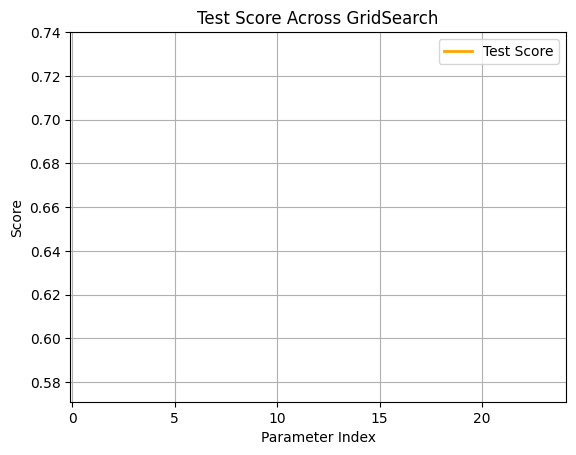

In [56]:
plt.plot(final_model.cv_results_['mean_test_score'], label='Test Score', lw=2, color='orange')
plt.title("Test Score Across GridSearch")
plt.xlabel("Parameter Index")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()
